In [1]:
## Observations and Insights 

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)






In [5]:
#Combine the data into a single dataset 
merge_df = pd.merge(mouse_metadata, study_results, on='Mouse ID', how='outer')

merge_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
#Checking Data for Duplicate time and points
# Display the data table for preview
duplicate_mice = merge_df.duplicated(subset=['Mouse ID', 'Timepoint',])
duplicate_mice

0       False
1       False
2       False
3       False
4       False
        ...  
1888    False
1889    False
1890    False
1891    False
1892    False
Length: 1893, dtype: bool

In [7]:
## Checking the number of mice.
# Got the same chart above using the .count function 
number_mice = merge_df["Mouse ID"].nunique()
number_mice

total_mice = merge_df["Mouse ID"].count()
total_mice

mice_df = pd.DataFrame({"Total Mice": [total_mice], "Unique Mice": [number_mice]})
mice_df

,Total Mice,Unique Mice
0,1893,249


In [8]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicate_mice = merge_df.duplicated(subset=['Mouse ID', 'Timepoint',])
duplicate_mice.value_counts()



False    1888
True        5
dtype: int64

In [9]:
# Optional: Get all the data for the duplicate mouse ID. 




In [10]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

clean_df = merge_df.drop_duplicates(subset = ['Mouse ID', 'Timepoint'], keep=False).reset_index(drop=True)

clean_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [11]:
# Checking the number of mice in the clean DataFrame.
number_miceclean = clean_df["Mouse ID"].nunique()
number_miceclean

total_mice_clean = clean_df["Mouse ID"].count()
total_mice_clean

clean_mice_df = pd.DataFrame({"Total Mice": [total_mice_clean], "Unique Mice": [number_miceclean]})
clean_mice_df


,Total Mice,Unique Mice
0,1883,249


## Summary Statistics

In [12]:
#Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
drug_group = clean_df.groupby("Drug Regimen")



In [13]:
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
tumor_volume_mean = drug_group["Tumor Volume (mm3)"].mean().rename("Mean Tumor Volume")
print(tumor_volume_mean)

Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.458254
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Mean Tumor Volume, dtype: float64


In [14]:
tumor_volume_median = drug_group["Tumor Volume (mm3)"].median().rename("Median Tumor Volume")
print(tumor_volume_median)


Drug Regimen
Capomulin    41.557809
Ceftamin     51.776157
Infubinol    51.820584
Ketapril     53.698743
Naftisol     52.509285
Placebo      52.288934
Propriva     50.854632
Ramicane     40.673236
Stelasyn     52.431737
Zoniferol    51.818479
Name: Median Tumor Volume, dtype: float64


In [15]:
tumor_volume_var = drug_group["Tumor Volume (mm3)"].var().rename("Tumor Volume Variance")
print(tumor_volume_var)

Drug Regimen
Capomulin    24.947764
Ceftamin     39.290177
Infubinol    43.128684
Ketapril     68.553577
Naftisol     66.173479
Placebo      61.168083
Propriva     44.053659
Ramicane     23.486704
Stelasyn     59.450562
Zoniferol    48.533355
Name: Tumor Volume Variance, dtype: float64


In [16]:
tumor_volume_std = drug_group["Tumor Volume (mm3)"].std().rename("Tumor Standard Deviation")
print(tumor_volume_std)

Drug Regimen
Capomulin    4.994774
Ceftamin     6.268188
Infubinol    6.567243
Ketapril     8.279709
Naftisol     8.134708
Placebo      7.821003
Propriva     6.637293
Ramicane     4.846308
Stelasyn     7.710419
Zoniferol    6.966589
Name: Tumor Standard Deviation, dtype: float64


In [17]:
tumor_volume_sem = drug_group["Tumor Volume (mm3)"].sem().rename("Tumor Volume SEM")
print(tumor_volume_sem)

Drug Regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Placebo      0.581331
Propriva     0.540135
Ramicane     0.320955
Stelasyn     0.573111
Zoniferol    0.516398
Name: Tumor Volume SEM, dtype: float64


In [18]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen


# Assemble the resulting series into a single summary dataframe.
summary_df = pd.DataFrame({
    "Mean Tumor Volume (mm3)": tumor_volume_mean, "Median Tumor Volume (mm3)": tumor_volume_median,
    "Tumor Volume Variance (mm3)": tumor_volume_var, "Tumor Volume Standar Deviation": tumor_volume_std,
    "Tumor Volume SEM": tumor_volume_sem
})

summary_df



,Mean Tumor Volume (mm3),Median Tumor Volume (mm3),Tumor Volume Variance (mm3),Tumor Volume Standar Deviation,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.458254,50.854632,44.053659,6.637293,0.540135
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [19]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
summary_group = clean_df.groupby('Drug Regimen').agg({'Tumor Volume (mm3)': ['mean', 'median', 'var', 'std', 'sem']})

summary_group


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.458254  50.854632  44.053659  6.637293  0.540135
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [20]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.

counts = clean_df["Drug Regimen"].value_counts()
type(counts)

pandas.core.series.Series

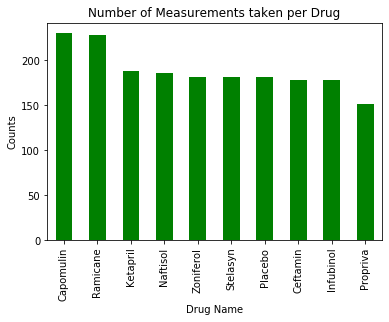

In [21]:
counts.plot(kind='bar', color='Green')

plt.xlabel("Drug Name")
plt.ylabel("Counts")
plt.title("Number of Measurements taken per Drug")
plt.show()

In [22]:
counts.values

array([230, 228, 188, 186, 182, 181, 181, 178, 178, 151])

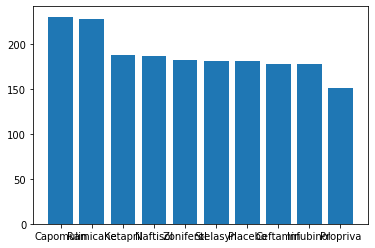

In [23]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
plt.bar(counts.index.values, counts.values)
plt.show()




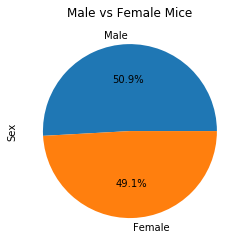

In [24]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_counts = clean_df["Sex"].value_counts()
gender_counts.plot(kind="pie", autopct="%1.1f%%")
plt.title("Male vs Female Mice")
plt.show()


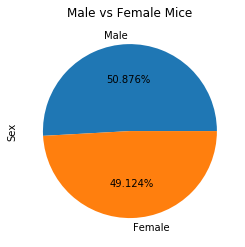

In [25]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
ender_counts = clean_df["Sex"].value_counts()
gender_counts.plot(kind="pie", autopct="%1.3f%%")
plt.title("Male vs Female Mice")
plt.show()



## Quartiles, Outliers and Boxplots

In [26]:
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1878,z969,Naftisol,Male,9,30,25,63.145652,2
1879,z969,Naftisol,Male,9,30,30,65.841013,3
1880,z969,Naftisol,Male,9,30,35,69.176246,4
1881,z969,Naftisol,Male,9,30,40,70.314904,4


In [27]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = clean_df.groupby(["Mouse ID"])["Timepoint"].max()
last_timepoint = last_timepoint.reset_index()
last_timepoint



,Mouse ID,Timepoint
0,a203,45
1,a251,45
2,a262,45
3,a275,45
4,a366,30
...,...,...
244,z435,10
245,z578,45
246,z581,45
247,z795,45


In [28]:
#Merged datafram for tumor volume at the last timepoint 

final_tumor_vol = pd.merge(clean_df, last_timepoint, on=["Mouse ID", "Timepoint"], how="right")
final_tumor_vol

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28,5,45.934712,0
245,z435,Propriva,Female,12,26,10,48.710661,0
246,z581,Infubinol,Female,24,25,45,62.754451,3
247,z795,Naftisol,Female,13,29,45,65.741070,3


In [29]:


# Put treatments into a list for for loop (and later for plot labels)
drugs = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
    

In [30]:
# Create empty list to fill with tumor vol data (for plotting)
finvol = []


In [31]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

# Locate the rows which contain mice on each drug and get the tumor volumes
for drug in drugs:
    finalvolume = final_tumor_vol.loc[final_tumor_vol["Drug Regimen"] == drug, "Tumor Volume (mm3)"]
     # add subset
    finvol.append(finalvolume)
    
        

In [32]:
# Determine outliers using upper and lower bounds
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
#firstquartile
lowerq = np.quantile(finvol, .25)
print(lowerq)

#median
median = np.quantile(finvol, .5)
print(median)

#thirdquartile
upperq = np.quantile(finvol, .75)
print(upperq)

iqr = upperq-lowerq
print(iqr)

#bounds
lower_bound = lowerq - (1.5*iqr)
print(lower_bound)
upper_bound = upperq + (1.5*iqr)
print(upper_bound)



NameError: name 'np' is not defined

In [33]:
# Determine outliers using upper and lower bounds
print(f"The lower quartile of tumor volume is: {lowerq}")
print(f"The upper quartile of tumor volume is: {upperq}")
print(f"The interquartile range of tumor volume is: {iqr}")
print(f"The the median of temperatures is: {median} ")
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

NameError: name 'lowerq' is not defined

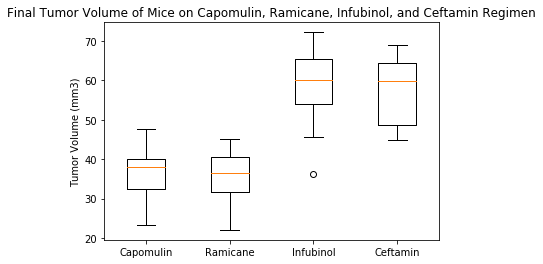

In [34]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume of Mice on Capomulin, Ramicane, Infubinol, and Ceftamin Regimen')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.boxplot(finvol)
ax1.set_xticklabels(drugs)
plt.show()


## Line and Scatter Plots

In [35]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin_df = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin"].reset_index()
capomulin_df = capomulin_df.drop(["index"], axis=1)
capomulin_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,s185,Capomulin,Female,3,17,0,45.000000,0
1,s185,Capomulin,Female,3,17,5,43.878496,0
2,s185,Capomulin,Female,3,17,10,37.614948,0
3,s185,Capomulin,Female,3,17,15,38.177232,0
4,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
225,i557,Capomulin,Female,1,24,45,47.685963,1
226,r157,Capomulin,Male,22,25,0,45.000000,0
227,r157,Capomulin,Male,22,25,5,45.597064,0
228,r157,Capomulin,Male,22,25,10,46.059608,0


In [36]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [37]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(xaxis, yaxis)
regress_values = xaxis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(xaxis, yaxis, color='green', edgecolor='red')
plt.xlabel('Weight (g)')
plt.ylabel('Avg. Tumor Vol. (mm3)')
plt.title("Weight vs. Avg. Tumor Volume of Mice on Capomulin Regimen")
plt.plot(xaxis,regress_values,"r--")
plt.annotate(line_eq,(18,36),fontsize=15,color="red")
plt.show()
print(f"The r-squared value is {rvalue**2}")


NameError: name 'xaxis' is not defined